In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

from sklearn.linear_model import LinearRegression as linreg
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score as cvs
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.metrics import confusion_matrix as confusion

df = pd.read_csv('gapminder.csv')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


<AxesSubplot:>

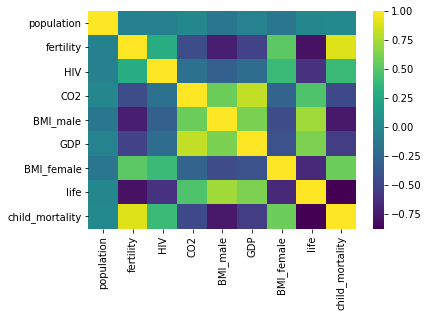

In [2]:
sns.heatmap(df.corr(),cmap="viridis")

0.6897899253684193


array([ 0.45915438,  0.49842658,  0.63834482,  0.85533407, -0.19680757])

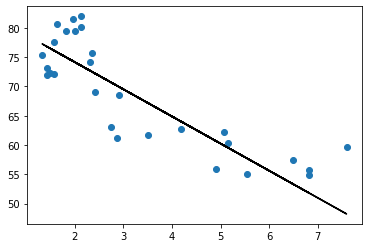

In [3]:
x = df['fertility']#df.drop(['life','Region'],axis=1)
y = df['life']
xtrain,xtest,ytrain,ytest = tts(x,y,test_size = 0.2)
xtrain = np.array(xtrain).reshape(-1,1)
xtest = np.array(xtest).reshape(-1,1)
linclass = linreg().fit(xtrain,ytrain)
linscore = linclass.score(xtest,ytest)
linpred = linclass.predict(xtest)
plt.scatter(xtest,ytest)
plt.plot(xtest,linpred,color='black')
print(linscore)
cvs(linclass,xtest,ytest)

In [4]:
x = df.drop(['life','Region'],axis=1)
y = df['life']
xtrain,xtest,ytrain,ytest = tts(x,y,test_size = 0.2)
linclass = linreg().fit(xtrain,ytrain)
linscore = linclass.score(xtest,ytest)
linpred = linclass.predict(xtest)
print(linscore)
# as could be expected the use of more information leads to a much more accurate model
cvs(linclass,xtest,ytest)
# although some values can be higher in the single feature model the average scores are still much higher using all features

0.9469557241914032


array([0.72359774, 0.9086908 , 0.8960627 , 0.87401202, 0.94661378])

In [5]:
ccd = pd.read_csv('creditcard.csv')
fraud = ccd.loc[ccd['Class'] == 1]
clean = ccd.loc[ccd['Class'] == 0]

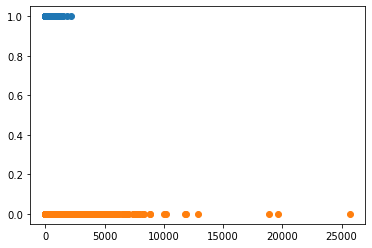

In [6]:
plt.scatter(fraud['Amount'],np.full(len(fraud),1))
plt.scatter(clean['Amount'],np.full(len(clean),0))
# there can be several reasons that fraudulent transactions are generally smaller, the largest I think is that
# bigger transactions attract more attention and scrutiny, whereas a series of smaller transactions are more likely
# to get a greater sum than a signle large transaction

<AxesSubplot:>

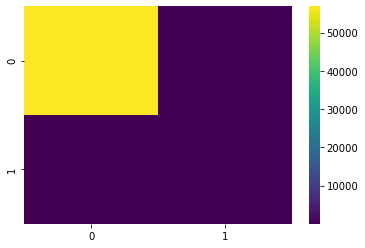

In [7]:
x = ccd.drop(['Class'], axis = 1)
y = ccd['Class']
xtrain,xtest,ytrain,ytest = tts(x,y,test_size = 0.2)
logpred = logreg(max_iter=1000).fit(xtrain,ytrain).predict(xtest)
sns.heatmap(confusion(ytest,logpred),cmap="viridis")